## bioinformatics coursework 2 part 1


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [18]:
# database col headers meanings:
# uuid?
# gene curie?


In [19]:
# Task 1

df = pd.read_csv("gencc-submissions.tsv", sep="\t")
# need to filter out non unique genes? / drop duplicates?
#df.groupby(['disease_title']).count().sort_values(by=['gene_curie']).filter(['gene_curie']).tail(10)
df.groupby(['disease_title']).nunique().sort_values(by=['gene_curie']).filter(['gene_curie']).tail(10)

,gene_curie
disease_title,
male infertility with azoospermia or oligozoospermia due to single gene mutation,53
syndromic intellectual disability,66
"hearing loss, autosomal recessive",72
mitochondrial disease,76
Tourette syndrome,76
nonsyndromic genetic hearing loss,85
schizophrenia,88
retinitis pigmentosa,90
Leigh syndrome,113


[ 58  74  77  78  87  89  93 104 127 159]
['primary ciliary dyskinesia', 'syndromic intellectual disability', 'mitochondrial disease', 'Tourette syndrome', 'hearing loss, autosomal recessive', 'schizophrenia', 'nonsyndromic genetic hearing loss', 'retinitis pigmentosa', 'Leigh syndrome', 'complex neurodevelopmental disorder']
                                     0    1
0           primary ciliary dyskinesia   58
1    syndromic intellectual disability   74
2                mitochondrial disease   77
3                    Tourette syndrome   78
4    hearing loss, autosomal recessive   87
5                        schizophrenia   89
6    nonsyndromic genetic hearing loss   93
7                 retinitis pigmentosa  104
8                       Leigh syndrome  127
9  complex neurodevelopmental disorder  159


C:\Users\andre\AppData\Local\Temp\ipykernel_15136\3236789593.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=data1, x=data1[0], y=data1[1], palette=sns.color_palette("BuGn_r", n_colors=len(data1[0])+4), ax=ax)
C:\Users\andre\AppData\Local\Temp\ipykernel_15136\3236789593.py:23: UserWarning: The palette list has more values (14) than needed (10), which may not be intended.
  g = sns.barplot(data=data1, x=data1[0], y=data1[1], palette=sns.color_palette("BuGn_r", n_colors=len(data1[0])+4), ax=ax)
C:\Users\andre\AppData\Local\Temp\ipykernel_15136\3236789593.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


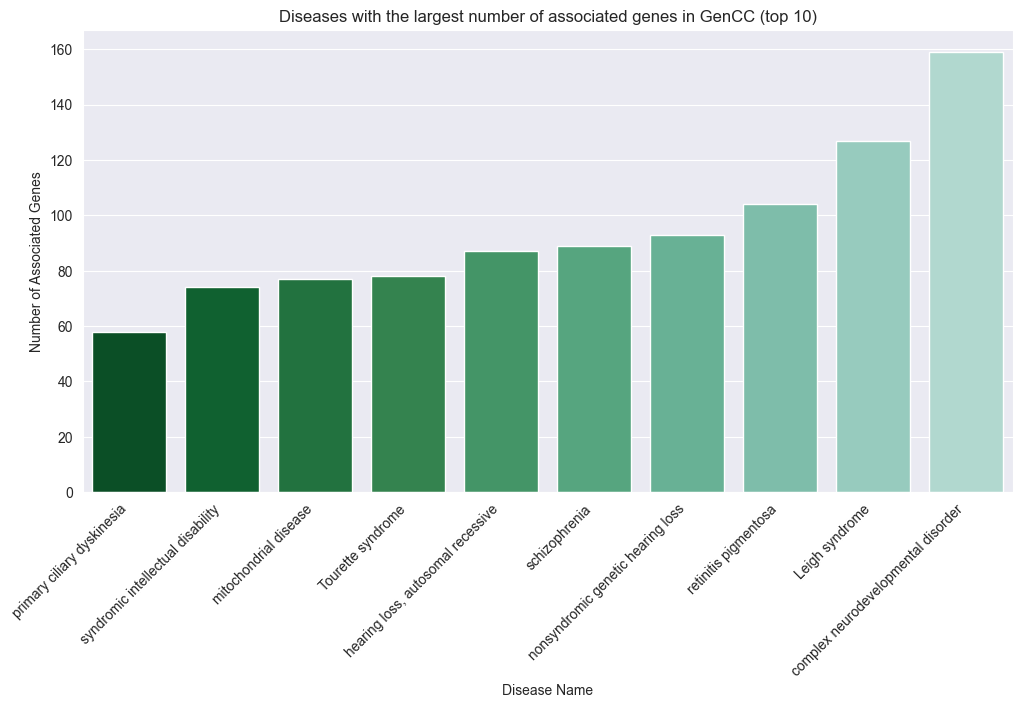

In [20]:
# Task 2

df = pd.read_csv("gencc-submissions.tsv", sep="\t")
df = df.groupby(['disease_title']).count().sort_values(by=['gene_curie']).tail(10)
df = df.filter(['gene_curie'])

ys = df.values.flatten()
xs = [label for label in df.index]

print(ys)
print(xs)

data1=zip(xs,ys)

data1=pd.DataFrame(data1)

print(data1)

# todo: textwrap to wrap text on the x axis, look up on stack overflow

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("darkgrid")
g = sns.barplot(data=data1, x=data1[0], y=data1[1], palette=sns.color_palette("BuGn_r", n_colors=len(data1[0])+4), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel("Disease Name")
ax.set_ylabel("Number of Associated Genes")
ax.set_title("Diseases with the largest number of associated genes in GenCC (top 10)")
plt.show()

In [21]:
# Task 3

df = pd.read_csv("gencc-submissions.tsv", sep="\t")
df.groupby(['classification_title']).count().filter(['uuid'])

,uuid
classification_title,
Definitive,4178
Disputed Evidence,182
Limited,2030
Moderate,1791
No Known Disease Relationship,246
Refuted Evidence,27
Strong,4720
Supportive,5330


                               uuid
classification_title               
Definitive                     4178
Disputed Evidence               182
Limited                        2030
Moderate                       1791
No Known Disease Relationship   246
Refuted Evidence                 27
Strong                         4720
Supportive                     5330


C:\Users\andre\AppData\Local\Temp\ipykernel_15136\923613948.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=data2, x=data2[0], y=data2[1], palette=sns.color_palette("BuGn_r", n_colors=len(data1[0])+4), ax=ax)
C:\Users\andre\AppData\Local\Temp\ipykernel_15136\923613948.py:16: UserWarning: The palette list has more values (14) than needed (8), which may not be intended.
  g = sns.barplot(data=data2, x=data2[0], y=data2[1], palette=sns.color_palette("BuGn_r", n_colors=len(data1[0])+4), ax=ax)
C:\Users\andre\AppData\Local\Temp\ipykernel_15136\923613948.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


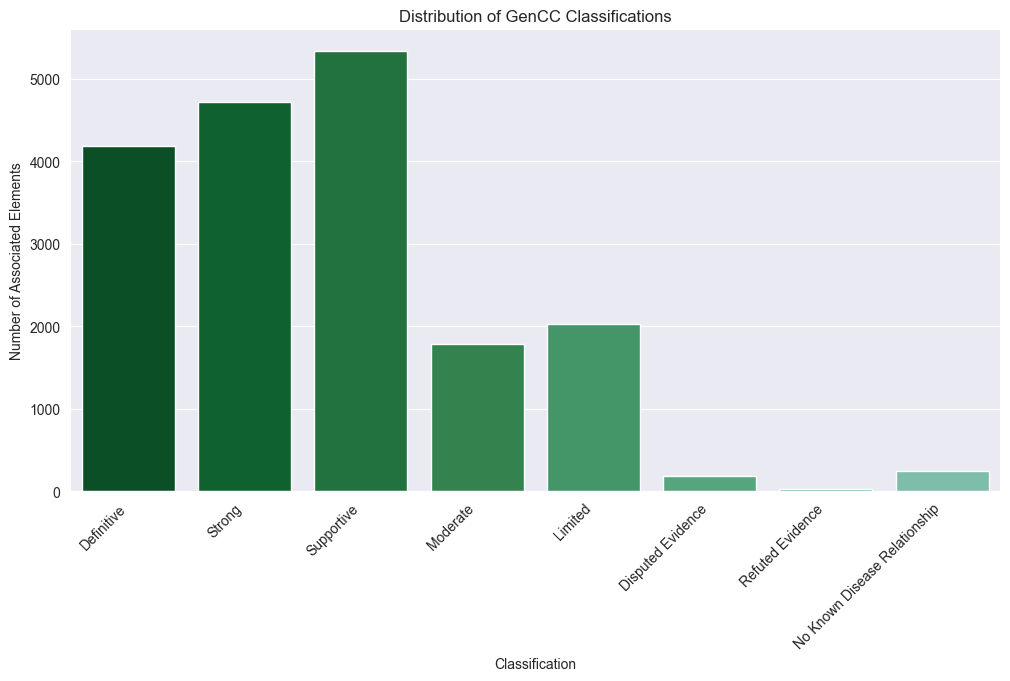

In [22]:
# Task 4

df = pd.read_csv("gencc-submissions.tsv", sep="\t")
df = df.groupby(['classification_title']).count().filter(['uuid'])
print(df)
x_labels = ['Definitive' , 'Strong' , 'Supportive' , 'Moderate' , 'Limited' , 'Disputed Evidence' , 'Refuted Evidence' , 'No Known Disease Relationship']
df = df.loc[x_labels]
df_ys = df.values.flatten()
df_xs = [label for label in df.index]
data2 = pd.DataFrame(zip(df_xs, df_ys))

# TODO: LABEL AXIS AND TITLE GRAPH

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("darkgrid")
g = sns.barplot(data=data2, x=data2[0], y=data2[1], palette=sns.color_palette("BuGn_r", n_colors=len(data1[0])+4), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel("Classification")
ax.set_ylabel("Number of Associated Elements")
ax.set_title("Distribution of GenCC Classifications")
plt.show()


df length 18504
{'PMID': 1706, 'DOI': 15550, 'No Provenence': 1248}
sum of cat counts (sanity check) = 18504


PMID entries make up 9.219628188499785% of all entries
DOI entries make up 84.0358841331604% of all entries
No Provenence entries make up 6.744487678339818% of all entries


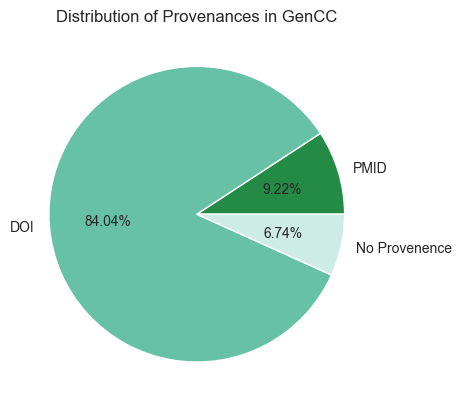

In [23]:
# Task 5

df = pd.read_csv("gencc-submissions.tsv", sep="\t")
df = df.filter(['submitted_as_assertion_criteria_url'])
print("df length", len(df))

catagory_counts = {'PMID':0, 'DOI':0, 'No Provenence':0}

def catagorise(item):
    item = item[0]
    if isinstance(item, float):
        catagory_counts['No Provenence'] += 1
    elif item[0:4] == "PMID":
        catagory_counts['PMID'] += 1
    # TODO: THIS IS A FALSE ASSUMPTION, ONLY ENTRIES WITH EXPLICIT DOI IN URL SHOULD BE INCLUDED, OTHERS CAN BE STUCK IN NO URL
    elif item[0:4] == "http":
        catagory_counts['DOI'] += 1

list(map(catagorise, df.values))

print(catagory_counts)
print("sum of cat counts (sanity check) =", sum(list(catagory_counts.values())))
print('\n')

n = len(df)
for k in catagory_counts:
    print("{} entries make up {}% of all entries".format(k, (catagory_counts[k]/n)*100))

# define data - not very efficient :(
labels = [x for x in catagory_counts]
data = [catagory_counts[y] for y in catagory_counts]

#define Seaborn color palette to use
colors = sns.color_palette("BuGn_r", n_colors=len(data))[0:3]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.title("Distribution of Provenances in GenCC")
plt.show()


{2011: 1, 2012: 0, 2013: 0, 2014: 0, 2015: 1708, 2016: 171, 2017: 786, 2018: 2246, 2019: 859, 2020: 3625, 2021: 7534, 2022: 1008, 2023: 564}


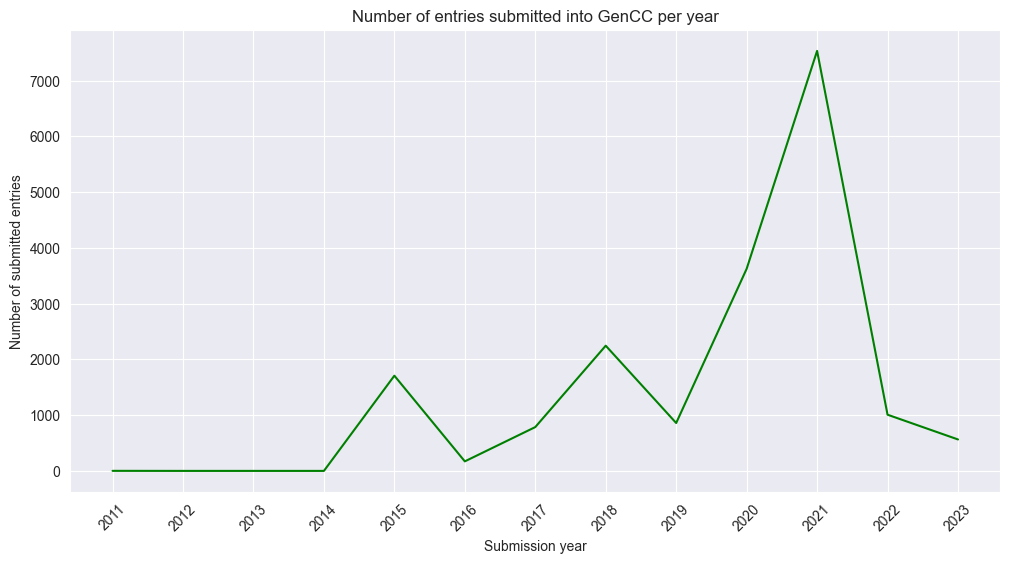

In [27]:
# Extension: 
# submission dates pattern analysis?


# plotting the number of submissions each year:
df = pd.read_csv("gencc-submissions.tsv", sep="\t")
dates_df = df.filter(['submitted_as_date'])
# cleaning the first and last element as they seem erroneous
dates_df = dates_df.drop(index=7274)
dates_df = dates_df.drop(index=6140)
dates_df = dates_df.sort_values(by=['submitted_as_date'])

dates_df = pd.to_datetime(dates_df['submitted_as_date'], format="%Y-%m-%d %H:%M:%S")
# dates_df['submitted_as_date'].groupby(pd.Grouper(freq='D')).count()

year_totals = {i:0 for i in range(2011, 2024)}

for x in dates_df:
    year_totals[x.year] += 1
    
print(year_totals)

fig, ax = plt.subplots(figsize=(12, 6))
plt.xticks(np.arange(2011, 2023+1, 1), rotation=45)
plt.yticks(np.arange(0, 8000, 1000))
plt.xlabel("Submission year")
plt.ylabel("Number of submitted entries")
plt.title("Number of entries submitted into GenCC per year")
plt.plot(year_totals.keys(), year_totals.values(), color='g')




{2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 43, 2016: 32, 2017: 78, 2018: 1165, 2019: 152, 2020: 233, 2021: 2, 2022: 0, 2023: 0}
{2011: 1, 2012: 0, 2013: 0, 2014: 0, 2015: 1665, 2016: 139, 2017: 708, 2018: 1081, 2019: 706, 2020: 2669, 2021: 7008, 2022: 1008, 2023: 564}
{2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 2019: 1, 2020: 723, 2021: 524, 2022: 0, 2023: 0}


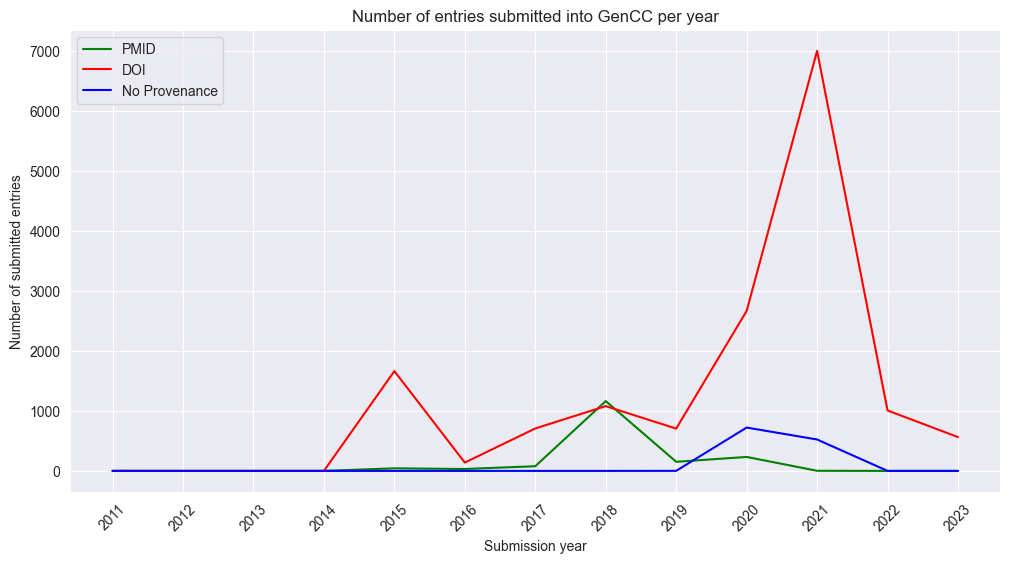

In [28]:
#TODO: PLOT DIFFERENT PROVENENCES PUBLISHED PER YEAR
from datetime import datetime

pids = []
dois = []
no_provs = []

dates_df = df.filter(['submitted_as_date', 'submitted_as_assertion_criteria_url'])
#dates_df = dates_df.drop(index=7274)
#dates_df = dates_df.drop(index=6140)
# dates_df = pd.to_datetime(dates_df['submitted_as_date'], format="%Y-%m-%d %H:%M:%S")

pmid_year_totals = {i:0 for i in range(2011, 2024)}
doi_year_totals = {i:0 for i in range(2011, 2024)}
no_prov_totals = {i:0 for i in range(2011, 2024)}

dates_arr = dates_df['submitted_as_date']
assertion_criteria_arr = dates_df['submitted_as_assertion_criteria_url']

for i in range(len(dates_arr)):
    if i != 7274 and i != 6140:  
        t = assertion_criteria_arr[i]
        year = datetime.strptime(dates_arr[i], "%Y-%m-%d %H:%M:%S").year
        if isinstance(t, float):
            no_prov_totals[year] += 1
        elif assertion_criteria_arr[i][:4] == "PMID":
            pmid_year_totals[year] += 1
        else:
            doi_year_totals[year] += 1

print(pmid_year_totals)
print(doi_year_totals)
print(no_prov_totals)

fig, ax = plt.subplots(figsize=(12, 6))
plt.xticks(np.arange(2011, 2023+1, 1), rotation=45)
plt.yticks(np.arange(0, 8000, 1000))
plt.plot(pmid_year_totals.keys(), pmid_year_totals.values(), color='g', label='PMID')
plt.plot(doi_year_totals.keys(), doi_year_totals.values(), color='r', label="DOI")
plt.plot(no_prov_totals.keys(), no_prov_totals.values(), color='b', label="No Provenance")
plt.xlabel("Submission year")
plt.ylabel("Number of submitted entries")
plt.title("Number of entries submitted into GenCC per year")
plt.legend(loc="upper left")

plt.show()
